In [1]:
import sys
import os

# add python folder
sys.path.insert(0, 'python')

import numpy as np
import matplotlib.pyplot as plt
import clustering
from IPython.display import clear_output
from sklearn.datasets import make_blobs

## Create dummy data

In [29]:
features = 10
XVal, yVal = make_blobs(n_samples=500, centers=3, n_features=features, random_state=0)

# Convert XVal to correct format needed in clustering.py
X = np.empty((len(XVal), features), dtype=np.float16)
for i in range(len(XVal)):
    X[i,:] = XVal[i]

## Cluster setup

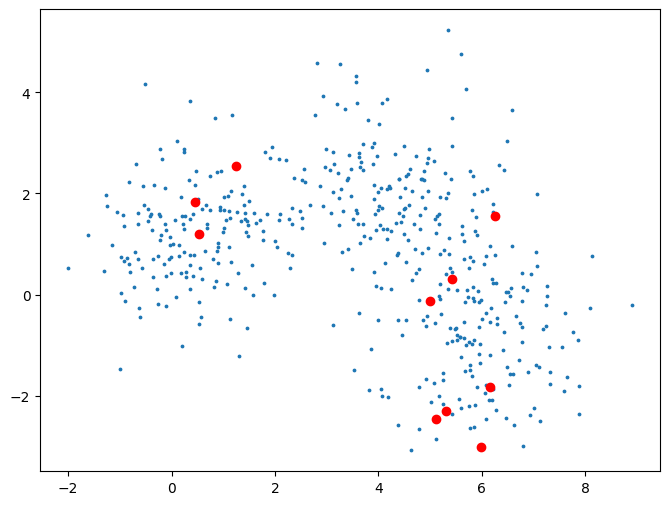

In [30]:
# Using the implementation for the clustering algorithm in clustering.py
cluster = clustering.Cluster()
cluster.load(X)
cluster.k = features
cluster.set_metric(clustering.METRIC.COSINE)
cluster.set_random_centroids()

# we choose randomly two features (defined by the 'features' variable) and plot
cluster.plot_datapoints(1,2) 


## The loss function
We can now manually test and see how many clusters we need to get an accurate result, but a better approach for when you have to manage big data is to use PCA or LDA.

In [36]:
loss = np.empty(features - 1 )
lossxValue = np.empty(features - 1)
for i in range(0, features - 1):
    cluster.load(X)
    cluster.k = i + 1
    cluster.set_metric(clustering.METRIC.COSINE)
    cluster.set_random_centroids()
    cluster.run_iteration(3)
    loss[i] = cluster.loss
    lossxValue[i] = i + 1

95.73957719322905
95.73957719322905
95.73957719322905
84.05700996577741
46.57289391408008
46.57289391408008
44.259690738836625
37.91910847713337
37.85785479863148
38.74013626051443
7.2242520710521285
7.177341547806518
7.088520136576874
7.065340740169704
7.055979045710623
24.8016936885881
6.655522158894858
6.591766561443065
6.479213289685883
6.377955702990838
6.3372400398034845
6.890274703370404
6.80831675807467
6.759282571910466
6.259538314840636
6.125298832699064
6.0764319751221425


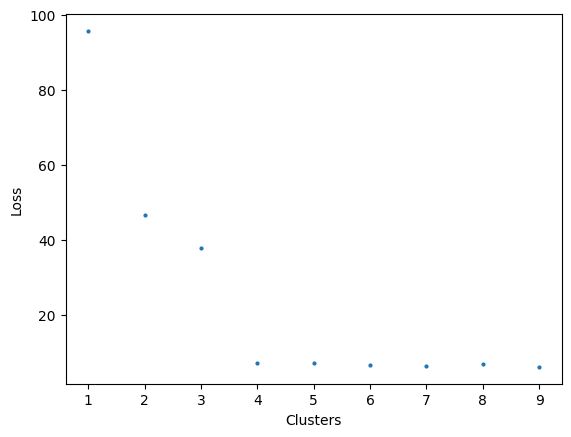

In [37]:
# plot loss function
plt.scatter(lossxValue, loss, s = 4)
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.show()

# Note: You will notice some variability because the medoids are selected randomly, so just
# make sure you have the correct number of iterations, the treand should be similar.

## K-Medoids in action

In [38]:
# Using our implementation we run using k = 3
cluster.load(X)
cluster.k = 3
cluster.set_metric(clustering.METRIC.COSINE)
cluster.set_random_centroids()
cluster.run_iteration(20)

47.690118364419895
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505
7.269086983118505


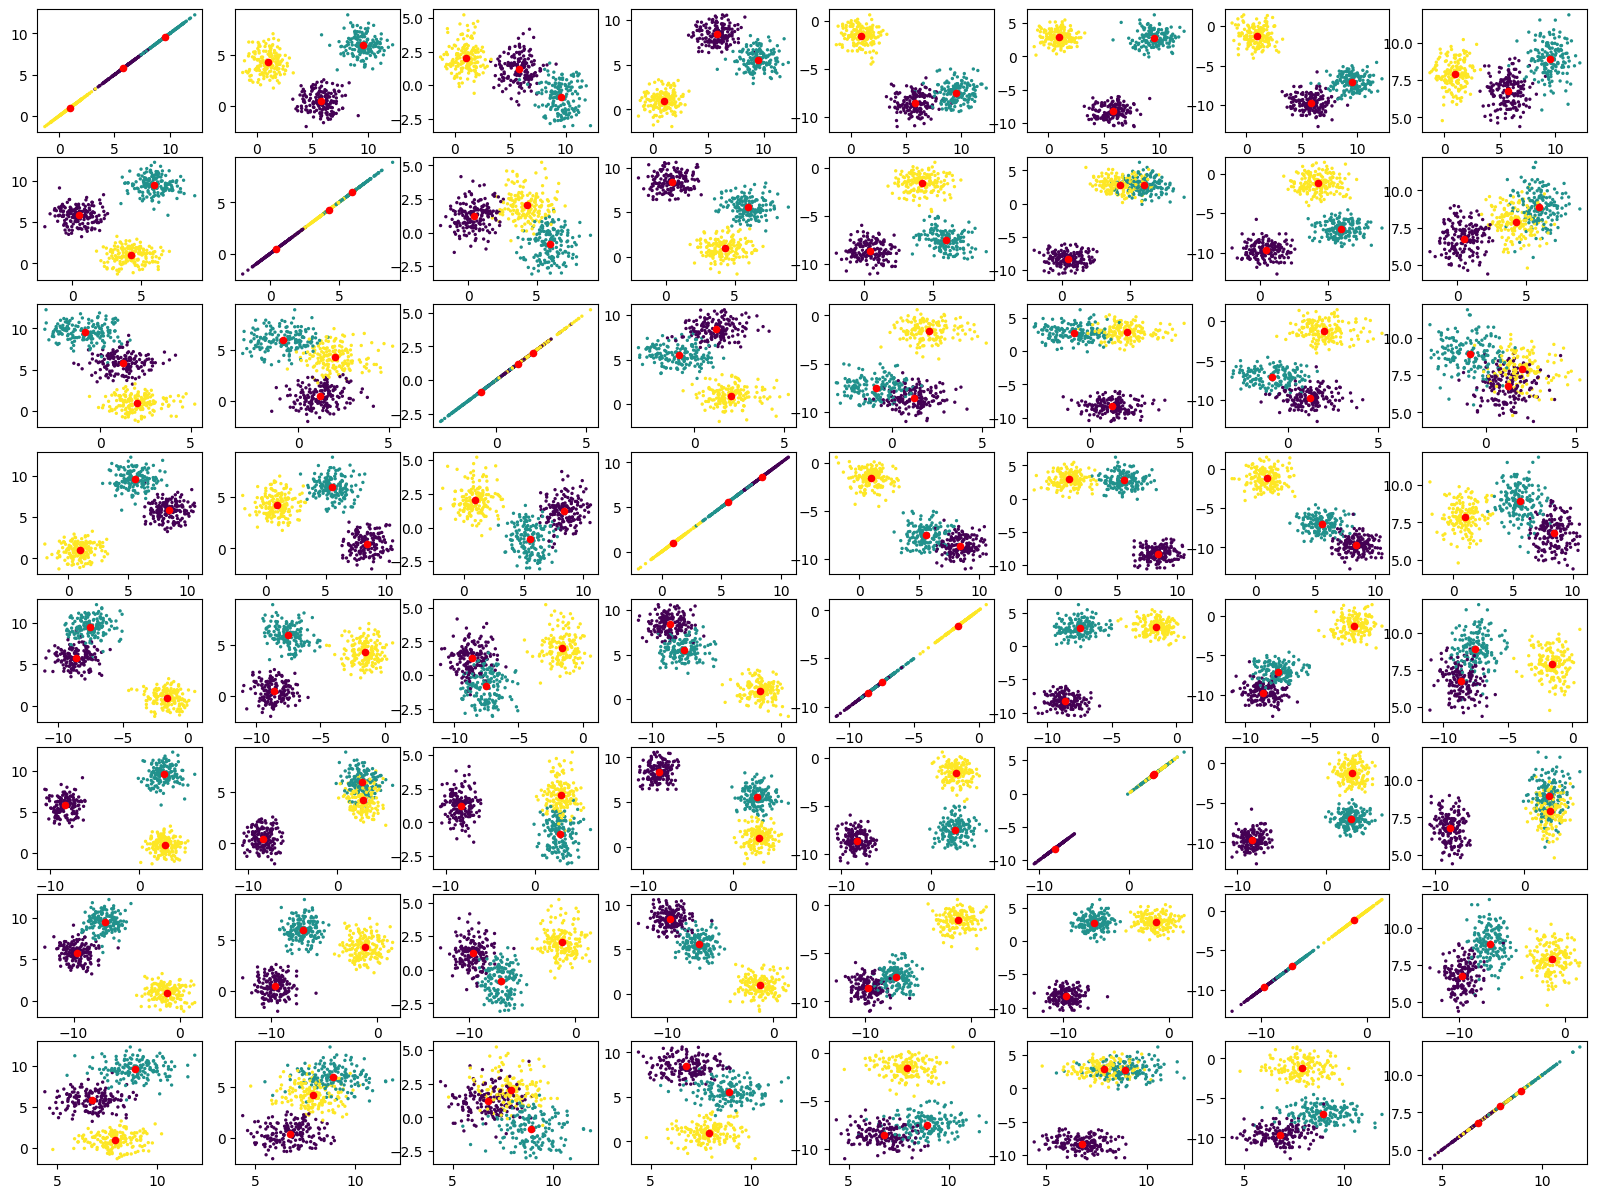

In [39]:
# we plot only 8x8 features at the time and start with the index 0-0
cluster.plot_classification_map(0,0)

Conclusion: this tests our implementation using the cosine metric and lloyd's algorithm for clustering on python.